用于画箱形图对比数据

In [1]:
import scipy.stats as stats
import csv
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
font_manager.fontManager.addfont('/SanDisk/Li/font_libin/times.ttf')

In [2]:
#设置绘图格式
config = {
    "font.family": 'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 20,
    "mathtext.fontset": 'stix',
}
plt.rcParams.update(config)

40 40
-0.8860612332803751 0.37830818039967284


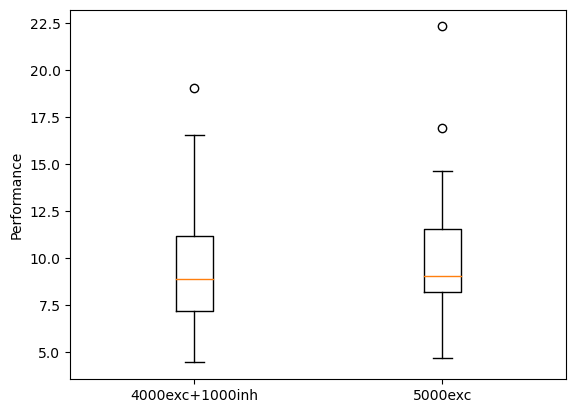

In [12]:
origin = []
origin_onlyexc = []

with open('prop_origin.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin.extend([float(item) for item in row])

with open('prop_origin_onlyexc.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin_onlyexc.extend([float(item) for item in row])

fig, ax = plt.subplots()
ax.boxplot([origin,origin_onlyexc])
# ax.set_title(title[j])
# ax.set_xlabel('Weight')
ax.set_ylabel('Performance')
ax.set_xticklabels(['4000exc+1000inh', '5000exc'])
print(len(origin),len(origin_onlyexc))
t_statistic, p_value = stats.ttest_ind(origin,origin_onlyexc)
print(t_statistic,p_value)

In [ ]:
# 读取csv文件并画图

title = ['E -> E','I -> E','E -> I','I -> I']
data_name = ['prop_change_EE_70','prop_change_EE_130',
        'prop_change_EI_70','prop_change_EI_130',
        'prop_change_IE_70','prop_change_IE_130',
        'prop_change_II_70','prop_change_II_130']
data = [[],[],
        [],[],
        [],[],
        [],[],]
origin = []

for i in range(len(data_name)):
    with open(f'{data_name[i]}.csv', mode='r') as file:
        # 创建一个CSV阅读器
        reader = csv.reader(file)
        # 遍历CSV文件中的每一行
        for row in reader:
            data[i].extend([float(item) for item in row])
            # print(row)  # 每个`row`是一个列表，包含了CSV行中的数据
with open('prop_origin.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin.extend([float(item) for item in row])

# data = np.array([np.array(item).astype(float) for item in data])
# origin = np.array(origin).astype(float)
j = 0
for i in range(0,8,2):
    fig, ax = plt.subplots()
    ax.boxplot([data[i],origin,data[i+1]])
    ax.set_title(title[j])
    ax.set_xlabel('Weight')
    ax.set_ylabel('Performance')
    ax.set_xticklabels(['-30%', '0', '+30%'])
    j += 1

    # 显示图形
    plt.show()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
[109758.38472465052, 20323.134600980036, 5534.773336274667, 4808.54067414243, 8284.255811607676, 3529.5253573071795, 2771.805548528716, 2368.6945270647857, 5026.572871326085, 4770.12675179888, 5192.915063226032, 3952.2106078514325, 4936.390024245543, 4682.559292879119, 5645.108825757092, 4502.959359330225, 6389.1511597259105, 6048.043785264689, 7849.257557506998, 7054.847195761507, 8599.544481791741, 847

Text(0, 0.5, 'Performance $\\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

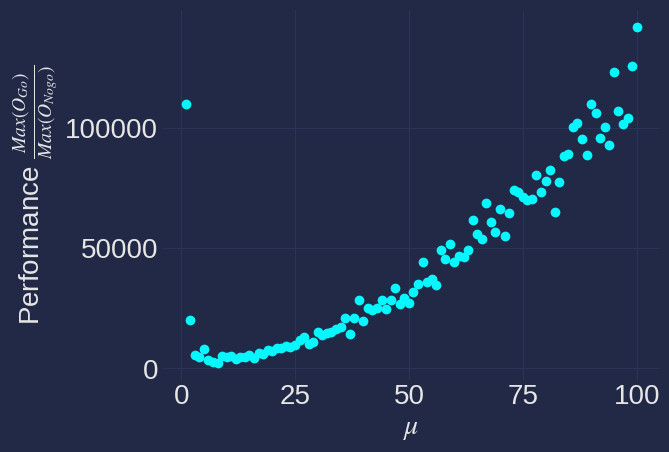

In [12]:
#画performance对mu,RS和sigma的依赖
folder = './change_mu_RS_sigma_N_5000_RS_0.1/'
# mu
with open(folder+'prop_change_mu.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: mu = [float(i) for i in row]
        else: 
            per_mu = [float(i) for i in row]
        count += 1

print(mu)
print(per_mu)

# import mplcyberpunk

# plt.style.use("cyberpunk")

fig, ax = plt.subplots()
ax.scatter(mu,per_mu)
# ax.set_yticks([])
# ax.set_ylim(0.5,2)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

# mplcyberpunk.make_scatter_glow()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[inf, 3251.079257216387, 1968.655141092734, 1529.1214329517625, 651.5781533449261, 609.0372583351475, 608.700471408169, 432.00504121678324, 487.19733839771925, 291.01880140798244, 244.49696955501145]


Text(0, 0.5, 'Performance $\\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

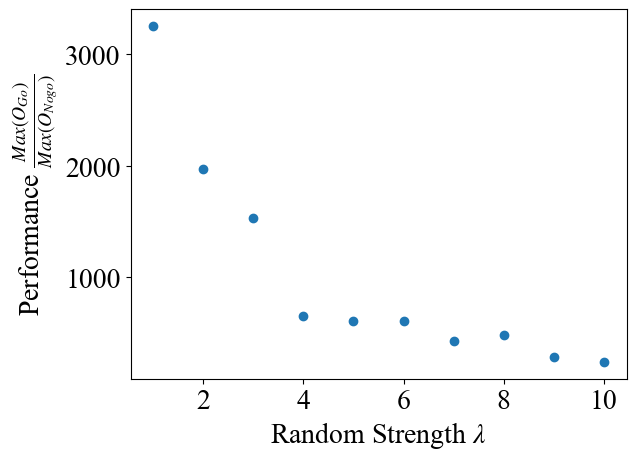

In [7]:
# RS
with open(folder+'prop_change_RS.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: rs = [float(i) for i in row]
        else: 
            per_rs = [float(i) for i in row]
        count += 1

print(rs)
print(per_rs)

fig, ax = plt.subplots()
ax.scatter(rs,per_rs)
# ax.set_ylim(0.5,2)
ax.set_xlabel(r'Random Strength $\lambda$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0]
[43732.024511025666, 33472.648979719546, 31626.04562936238, 33080.55346650195, 21865.077318022482, 26193.288848345546, 33034.68574128375, 27452.81162456413, 23934.704032583388, 24337.3659560276, 25881.239839752187, 38322.33889932374, 44726.487532553045, 34719.94030832269, 56551.979828019554, 39761.840123029375, 34079.30411640118, 41149.920490862336, 41326.59289778883, 22594.39290186518, 20009.61048567233, 41333.894795504944, 28601.120202129656, 35039.84632319943, 36560.05191794093, 55706.96228206956, 67730.73269074378, 36570.22634192575, 53051.4924865004, 31303.669602147, 65047.176

Text(0, 0.5, 'Performance $\\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

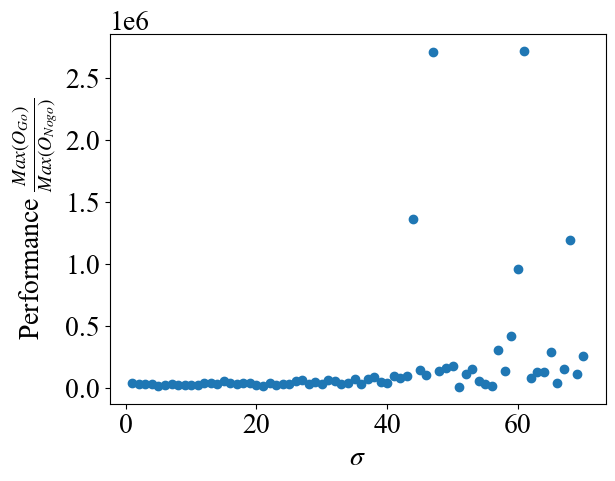

In [8]:
# Sigma
with open(folder+'prop_change_sigma.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: sigma = [float(i) for i in row]
        else: 
            per_sigma = [float(i) for i in row]
        count += 1

print(sigma)
print(per_sigma)

fig, ax = plt.subplots()
ax.scatter(sigma,per_sigma)
# ax.set_ylim(0.5,200000)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')